In [1]:
# https://blog.devgenius.io/implementing-na%C3%AFve-bayes-classification-from-scratch-with-python-badd5a9be9c3
import pandas as pd
import numpy as np

In [5]:
# Load Data
df = pd.read_csv("naive_bayes_iris.csv")
df = df.drop("Id", axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Data Preprocessing
train = df.sample(frac = 0.7, random_state = 1)
test = df.drop(train.index)

y_train = train["Species"]
x_train = train.drop("Species", axis = 1)

y_test = test["Species"]
x_test = test.drop("Species", axis = 1)

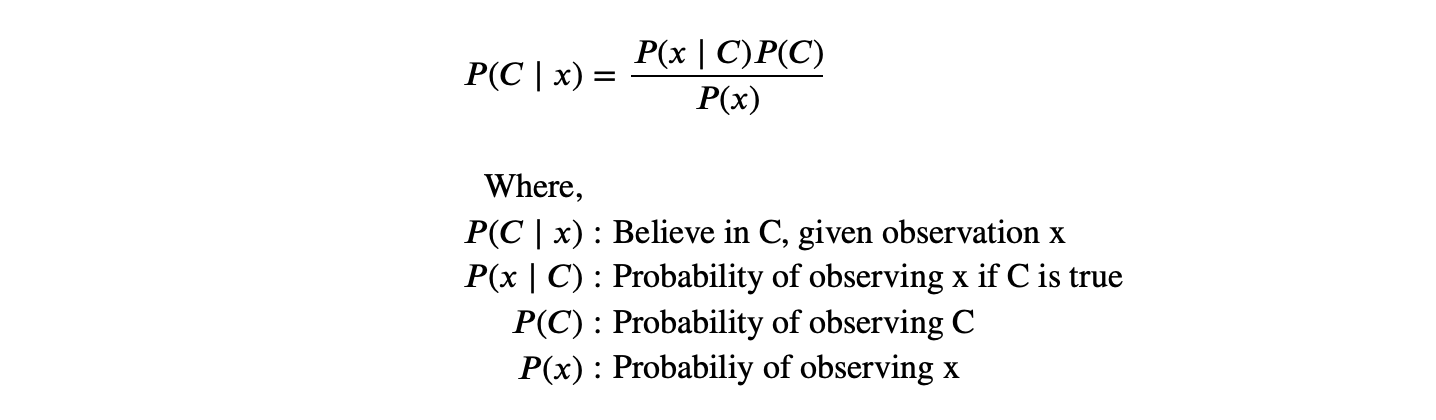

In [7]:
# Model Training
means = train.groupby(["Species"]).mean() # Estimate mean of each class, feature
var = train.groupby(["Species"]).var() # Estimate variance of each class, feature
prior = (train.groupby("Species").count() / len(train)).iloc[:,1] # Estimate prior probabilities
classes = np.unique(train["Species"].tolist()) # Storing all possible classes

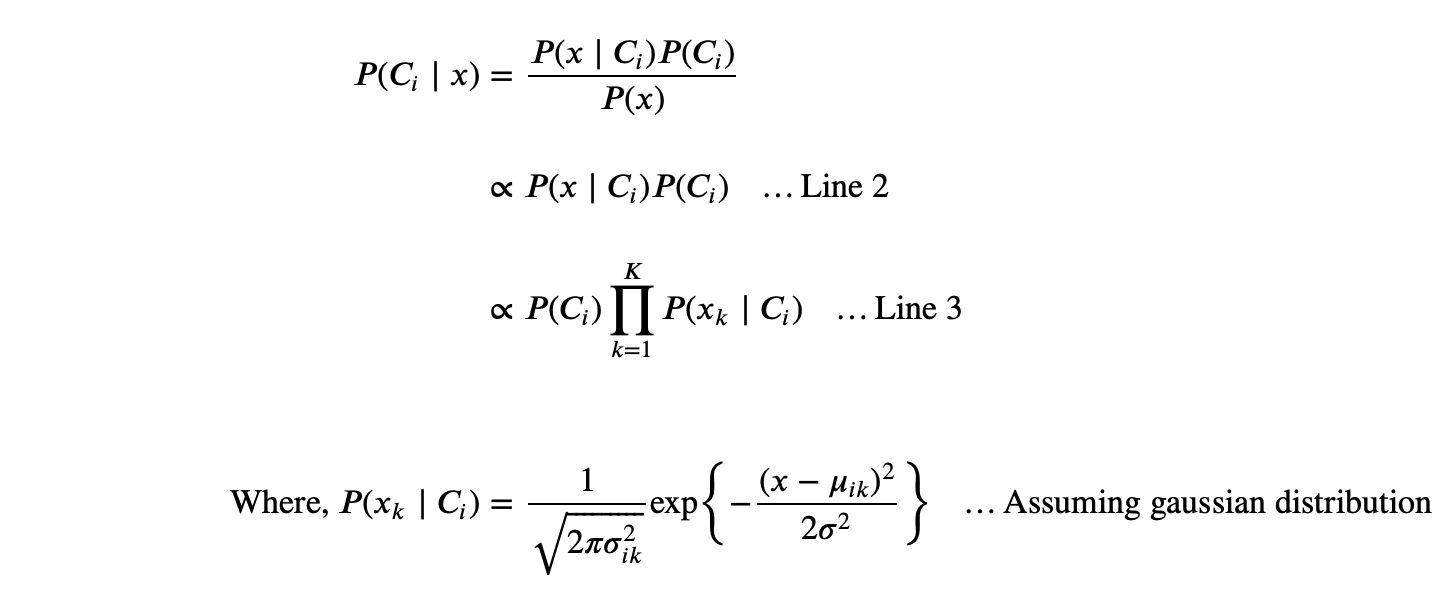

In [8]:
# Classification
def Normal(n, mu, var):
    
    # Function to return pdf of Normal(mu, var) evaluated at x
    sd = np.sqrt(var)
    pdf = (np.e ** (-0.5 * ((n - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))
    
    return pdf

def Predict(X):
    Predictions = []
    
    for i in X.index: # Loop through each instances
        
        ClassLikelihood = []
        instance = X.loc[i]
        
        for cls in classes: # Loop through each class
            
            FeatureLikelihoods = []
            FeatureLikelihoods.append(np.log(prior[cls])) # Append log prior of class 'cls'
            
            for col in x_train.columns: # Loop through each feature
                
                data = instance[col]
                
                mean = means[col].loc[cls] # Find the mean of column 'col' that are in class 'cls'
                variance = var[col].loc[cls] # Find the variance of column 'col' that are in class 'cls'
                
                Likelihood = Normal(data, mean, variance)
                
                if Likelihood != 0:
                    Likelihood = np.log(Likelihood) # Find the log-likelihood evaluated at x
                else:
                    Likelihood = 1/len(train) 
                
                FeatureLikelihoods.append(Likelihood)
                
            TotalLikelihood = sum(FeatureLikelihoods) # Calculate posterior
            ClassLikelihood.append(TotalLikelihood)
            
        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Find largest posterior position
        Prediction = classes[MaxIndex]
        Predictions.append(Prediction)
        
    return Predictions

In [9]:
# Assess the model’s performance
PredictTrain = Predict(x_train)
PredictTest = Predict(x_test)

In [10]:
def Accuracy(y, prediction):
    
    # Function to calculate accuracy
    y = list(y)
    prediction = list(prediction)
    score = 0
    
    for i, j in zip(y, prediction):
        if i == j:
            score += 1
            
    return score / len(y)

In [11]:
# For the training set:
round(Accuracy(y_train, PredictTrain), 5)

0.98095

In [12]:
# For the test set:
round(Accuracy(y_test, PredictTest), 5)

0.91111

### Library

In [13]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() # Gaussian Naïve Bayes assumes gaussian data
clf.fit(x_train, y_train)
SkTrain = clf.predict(x_train) # Predicting on the train set
SkTest = clf.predict(x_test) # Predicting on the test set

In [14]:
# For the training set:
round(Accuracy(PredictTrain, SkTrain), 5)

1.0

In [15]:
# For the test set:
round(Accuracy(PredictTest, SkTest), 5)

1.0